In [179]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pa
import statsmodels.api as sm
from pmdarima.arima import auto_arima

In [10]:
white_noise = np.random.normal(0,0.1,size=1000)

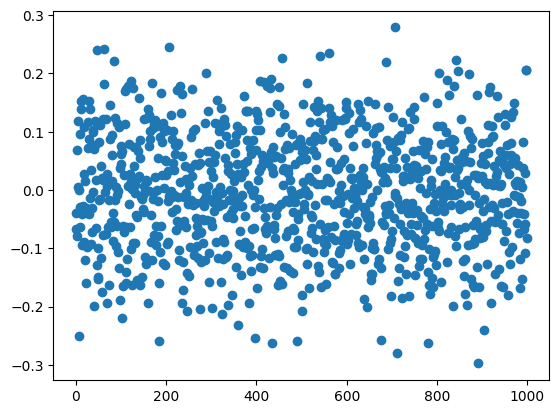

In [11]:
plot.scatter(x=list(range(0,1000)),y=white_noise)

In [14]:
correlation_matrix = np.corrcoef(white_noise[:-1],white_noise[1:])

In [15]:
correlation_matrix

array([[ 1.        , -0.02261245],
       [-0.02261245,  1.        ]])

In [106]:
coef_1 = 0.8
# coef_2 = 0.4

In [107]:
X_0 = 100
# X_1 = 110

In [108]:
n = 1000

white_noise = np.random.normal(0,30,n)

X_t = list()
X_t.append(X_0)
# X_t.append(X_1)

# for i in range(2,n):
for i in range(1,n):
#     x_t = X_t[i-1] * coef_1 + X_t[i-2]*coef_2 + white_noise[i]
    x_t = X_t[i-1] * coef_1 + white_noise[i]
    X_t.append(x_t)

Xt_ts = pa.Series(X_t)


<Axes: >

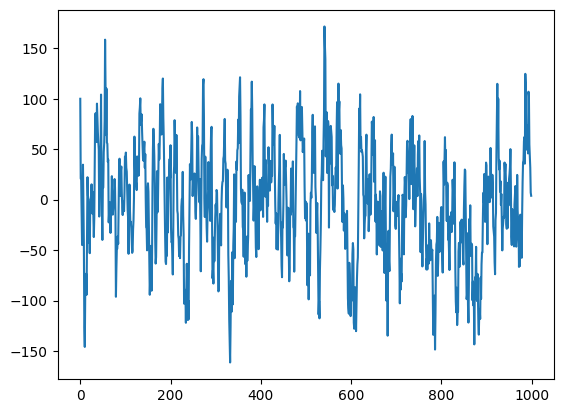

In [109]:
Xt_ts.plot()

In [110]:
electricity_production_data = pa.read_csv("Electric_Production.csv")

In [112]:
electricity_production_data = electricity_production_data.rename(columns={"IPG2211A2N":"Electr_production"})

<Axes: >

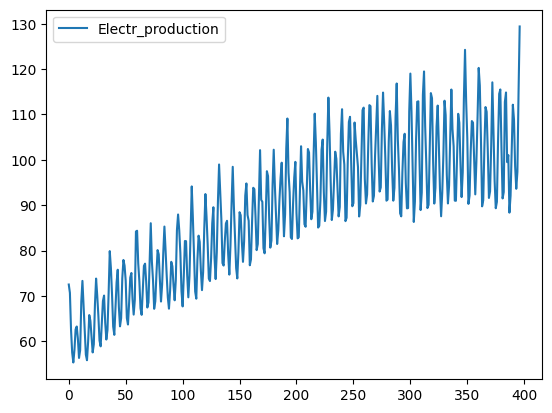

In [114]:
electricity_production_data.plot()


In [123]:
data = electricity_production_data["Electr_production"]
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

In [125]:
mu = 10
coef_1 = 0.8
coef_2 = 0.4

n = 1000

white_noise = np.random.normal(0,5,n+2)

X_t = list()

x_0 = mu + white_noise[0]*coef_1 + white_noise[1] * coef_2 + white_noise[2]

for i in range(0,n):
    x_t = mu + white_noise[i]*coef_1 + white_noise[i+1] * coef_2 + white_noise[i+2]
    X_t.append(x_t)

Xt_ts = pa.Series(X_t)


<Axes: >

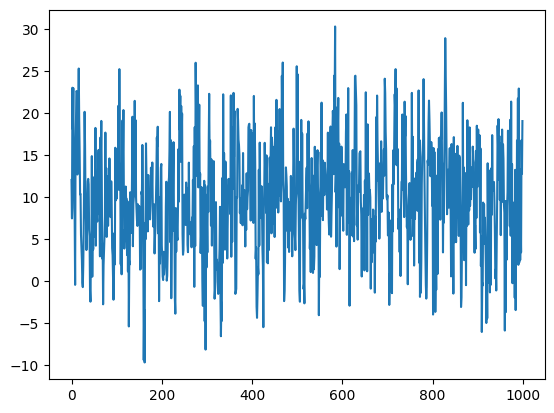

In [126]:
Xt_ts.plot()

In [127]:
rolling_mean = data.rolling(window=6).mean()

In [152]:
data_no_trend = data - rolling_mean#remove trend

In [138]:
# data_cleared = data_no_trend - data_no_trend.diff(periods=6)

<Axes: >

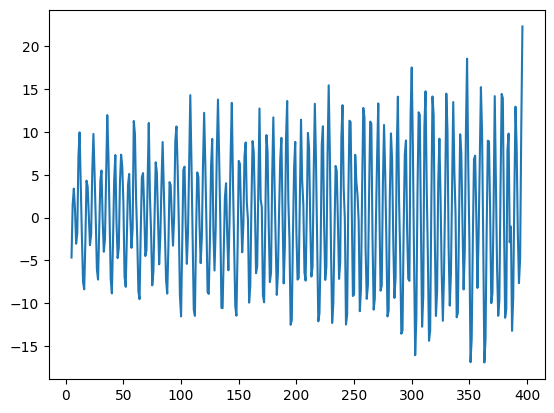

In [153]:
data_no_trend.plot()

<StemContainer object of 3 artists>

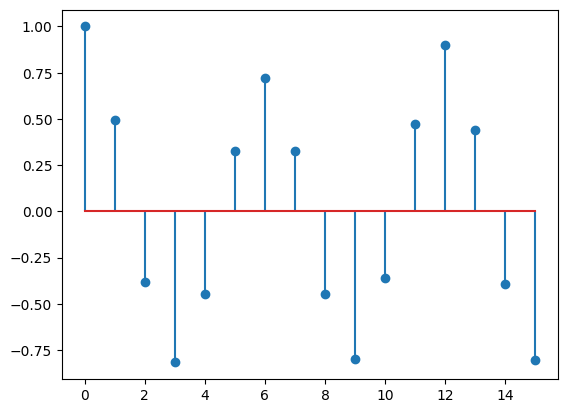

In [154]:
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=15)
plot.stem(range(0,len(acf)),acf)

In [166]:
data_cleared = data_no_trend.diff(periods=6)
data_cleared = data_cleared[data_cleared.notnull()]

<Axes: >

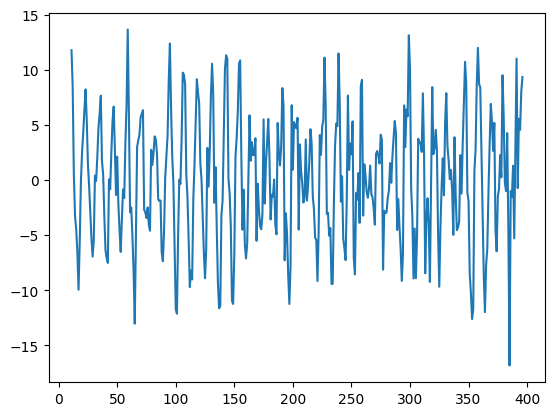

In [167]:
data_cleared.plot()

<StemContainer object of 3 artists>

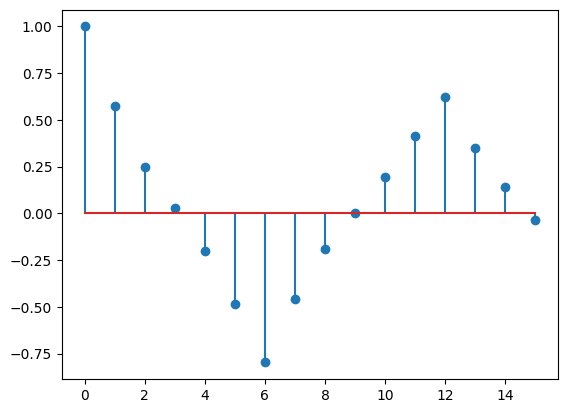

In [165]:
acf = sm.tsa.stattools.acf(data_cleared,nlags=15)
plot.stem(range(0,len(acf)),acf)

In [172]:
model = sm.tsa.arima.ARIMA(data_cleared,order=(2,0,0))#AR(2)
results = model.fit()

C:\Users\arturs.olekss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arturs.olekss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arturs.olekss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [173]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Electr_production   No. Observations:                  386
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1107.303
Date:                Tue, 11 Jul 2023   AIC                           2222.605
Time:                        21:15:46   BIC                           2238.429
Sample:                             0   HQIC                          2228.880
                                - 386                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1287      0.492      0.261      0.794      -0.836       1.094
ar.L1          0.7699      0.047     16.406      0.000       0.678       0.862
ar.L2         -0.2064      0.049     -4.198      0.000      -0.303      -0.110
sigma2        18.1353      1.443     12.567      0.000      15.307      20.964
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.44   Prob(JB):                         0.53
Heteroskedasticity (H):               1.66   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\arturs.olekss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\arturs.olekss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


386    5.610594
387    2.444198
388    0.779983
389    0.152216
390    0.012383
         ...   
481    0.128713
482    0.128713
483    0.128713
484    0.128713
485    0.128713
Name: predicted_mean, Length: 100, dtype: float64

In [182]:
model = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results = model.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2434.623, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2237.175, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2247.720, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2432.698, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2222.605, Time=1.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2213.711, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2174.977, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2090.094, Time=0.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1997.567, Time=0.26 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1995.638, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2007.403, T

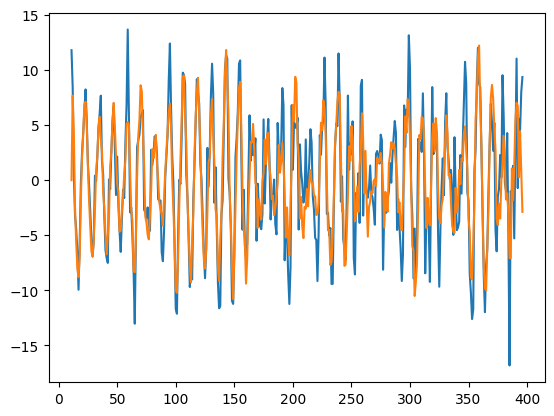

In [186]:
#ARMA(5,1)

plot.plot(data_cleared)
plot.plot(results.fittedvalues())

In [187]:
model = auto_arima(data,trace=True,suppress_warnings=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.30 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.32 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

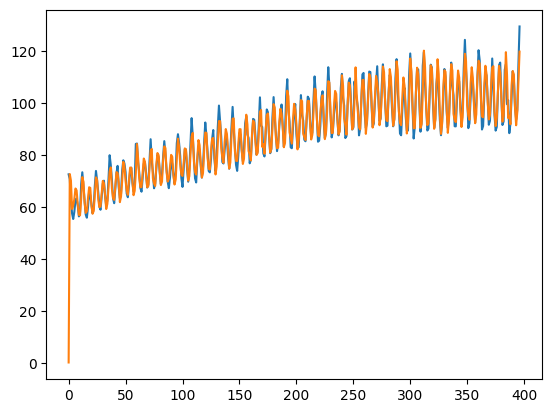

In [188]:
plot.plot(data)
plot.plot(results.fittedvalues())

In [189]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Tue, 11 Jul 2023   AIC                           2058.740
Time:                        21:26:07   BIC                           2090.591
Sample:                             0   HQIC                          2071.359
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1108      0.024      4.711      0.000       0.065       0.157
ar.L1          0.9986      0.002    507.854      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -754.175      0.000      -1.002      -0.997
ma.L1         -1.3641      0.038    -35.677      0.000      -1.439      -1.289
ma.L2          0.9232      0.071     12.937      0.000       0.783       1.063
ma.L3          0.0064      0.071      0.089      0.929      -0.134       0.146
ma.L4         -0.4329      0.042    -10.250      0.000      -0.516      -0.350
sigma2         9.8846      0.634     15.587      0.000       8.642      11.128
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                22.00
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [197]:
resid = results.resid()
resid = resid[1:]

<Axes: >

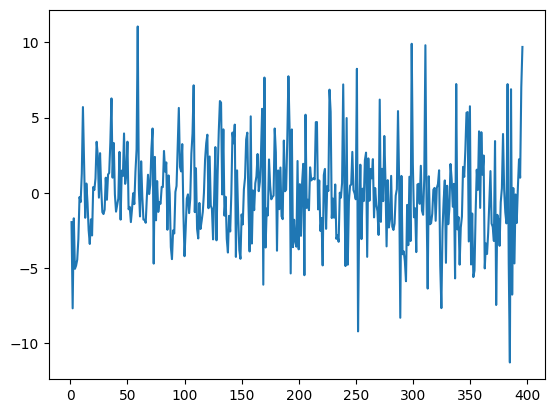

In [198]:
resid.plot()

In [199]:
correlation_matrix = np.corrcoef(resid[:-1],resid[1:])

In [200]:
correlation_matrix

array([[1.        , 0.06265207],
       [0.06265207, 1.        ]])